# Redes Lógicas Tensoriais com LTNTorch: Uma Introdução com Exemplos Práticos


## O que é uma Rede Lógica Tensorial (LTN)?
O LTN é um framework Neuro-Simbólico (NeSi) que combina efetivamente o poder do deep learning (Tensores) com o rigor do raciocínio
lógico (Lógica).

### A Ideia Central
Definir uma base de conhecimento lógico (KB)
e usá-la como a função objetivo (ou função de perda) para um modelo neural.

### Como isso é Possível?
Isso é possível usando lógica fuzzy, que relaxa os valores de verdade clássicos (Verdadeiro/Falso ou 1/0)
para um intervalo contínuo $[0, 1]$.

Isso torna as operações lógicas diferenciáveis, permitindo o aprendizado através da otimização padrão de
gradient descent (descida de gradiente).


### O Conceito Fundamental: Lógica Real (Real Logic)
LTN é baseado em uma linguagem formal chamada "Lógica Real" (Real Logic).

- Domínios: São interpretados como Tensores no corpo dos números reais $\mathbb{R}^n$ (incluindo escalares, vetores, matrizes, etc.).
- "Aterramento" (Grounding, $\mathcal{G}$): Este é o termo do LTN para a "interpretação" da lógica. Ele mapeia símbolos lógicos para tensores e funções diferenciáveis:
    - Constantes (ex: 'a', 'b') $\rightarrow$ Tensores (ex: vetores de embedding em $\mathbb{R}^d$).
    - Predicados (ex: 'P(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para um valor de verdade em $[0, 1]$.Ex: $P: \mathbb{R}^d \rightarrow [0, 1]$
    - Funções (ex: 'f(x)') $\rightarrow$ Funções Diferenciáveis (ex: uma rede neural) que mapeiam tensores para outros tensores.Ex: $f: \mathbb{R}^d \rightarrow \mathbb{R}^m$

## Tornando a Lógica Diferenciável: Operadores Fuzzy

Para que o backpropagation funcione, precisamos substituir os operadores lógicos clássicos ($\land, \lor, \lnot, \forall, \exists, \implies$) por versões "fuzzy" que sejam diferenciáveis.

Conectivos (t-normas, t-conormas)
* Conjunção ($\land$): t-norma do produto:$\mathcal{A}_{\land}(u, v) = u \cdot v$
* Disjunção ($\lor$): t-conorma do produto:$\mathcal{A}_{\lor}(u, v) = u + v - u \cdot v$
* Negação ($\lnot$): Negação padrão:$\mathcal{A}_{\lnot}(u) = 1 - u$
* Implicação ($\implies$): Implicação de Reichenbach:$\mathcal{A}_{\implies}(u, v) = 1 - u + u \cdot v$

Quantificadores (Agregadores)
- Universal ($\forall x$): Média generalizada (p-mean error):$\mathcal{A}_{\forall}(u_1, ..., u_n) = 1 - \left(\frac{1}{n}\sum_{i=1}^{n}(1-u_{i})^{p}\right)^{\frac{1}{p}}$
- Existencial ($\exists x$): Média generalizada (p-mean):$\mathcal{A}_{\exists}(u_1, ..., u_n) = \left(\frac{1}{n}\sum_{i=1}^{n}u_{i}^{p}\right)^{\frac{1}{p}}$

Ponto Chave: Todas estas operações são diferenciáveis, permitindo-nos propagar gradientes através de fórmulas lógicas complexas.
    

O Framework LTNtorch

LTNtorch é a implementação prática desses conceitos em PyTorch. Ele fornece os blocos de construção fundamentais:
- ltn.Constant: Um tensor que representa uma constante lógica (ex: um embedding fixo).
- ltn.Variable: Um tensor para variáveis (ex: 'x', 'y') que serão usadas em quantificadores.
- ltn.Predicate: Um torch.nn.Module que retorna um valor em $[0, 1]$. É aqui que a rede neural "aprende".
- ltn.Function: Um torch.nn.Module que retorna um tensor.
- ltn.Connective: And, Or, Not, Implies.ltn.
- Quantifier: Forall, Exists.ltn.
- Aggregator: SatAgg (Agrega o nível de satisfação de todas as fórmulas na Base de Conhecimento).

O Processo de Aprendizado em 5 PassosO fluxo de trabalho para treinar um modelo LTN é o seguinte:

1. Definir a Base de Conhecimento (KB): Escreva seus axiomas (conhecimento prévio) usando os componentes do LTNtorch.
2. Aterramento (Grounding): Alimente os dados de treinamento (tensores PyTorch) nas ltn.Variable das fórmulas.
3. Avaliação: Calcule o nível de satisfação de toda a KB (um único valor em $[0, 1]$) usando SatAgg.
4. Cálculo da Perda (Loss): A perda é simplesmente $Loss = 1.0 - SatAgg(\text{KB})$. Nosso objetivo é minimizar essa perda, o que equivale a maximizar a satisfação da lógica.
5. Otimização: Use um otimizador padrão do PyTorch (como Adam) para fazer o backpropagate da perda e atualizar os parâmetros dos ltn.Predicate (as redes neurais).

## Tutorial Prático: Classificação Binária
Vamos aplicar esses conceitos a um problema simples de classificação binária (baseado em 1-binary_classification.ipynb

Problema: Classificar pontos 2D em duas classes, A (positiva) e Não-A (negativa).

Configuração do LTN:
1. Predicado: Precisamos de um predicado A(x) que aprenda "O ponto x pertence à classe A?". Vamos usar uma pequena rede neural (MLP) para isso.
2. Variáveis: Precisamos de variáveis para conter nossos dados: x_A (exemplos positivos) e x_B (exemplos negativos).
3. Base de Conhecimento (Axiomas):
   - Axioma 1: Todos os exemplos positivos devem ser A.
     * $\forall x_A (A(x_A))$
   - Axioma 2: Todos os exemplos negativos NÃO devem ser A.
     * $\forall x_B (\lnot A(x_B))$

In [1]:
!pip install LTNtorch

### Código: 1.
Imports e Definição do ModeloPrimeiro, importamos torch e ltntorch, e definimos nossa rede neural (MLP) que servirá como o predicado. Esta rede neural é o componente que irá aprender.import torc

In [ ]:
import torch
import torch.nn as nn
import ltn
import numpy as np
import matplotlib.pyplot as plt

# 1. Configuração inicial
# Se tiver GPU, usamos. Senão, CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# 2. Definição da Rede Neural (O "Cérebro" do Predicado)
class MLP(nn.Module):
    """Um Perceptron Multicamadas simples que retorna valores entre 0 e 1."""
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid() # Importante: LTN precisa de valores [0,1]

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

Usando dispositivo: cpu


### Código: 2. Geração de Dados
Criamos alguns dados 2D de exemplo. A Classe A (positiva) está no centro, e a Classe B (negativa) está ao redor.


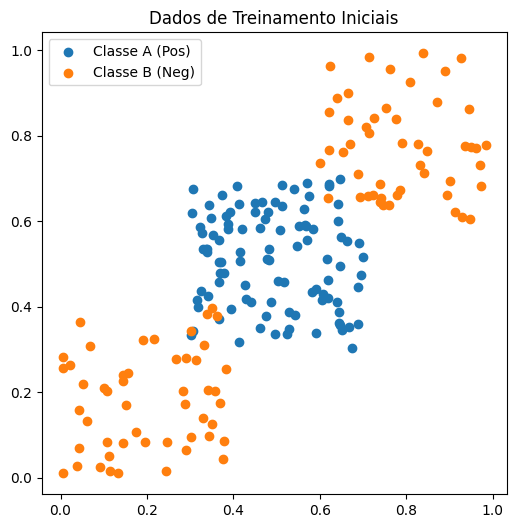

In [ ]:
# Classe A (Positiva) - Centro
data_pos = (torch.rand((100, 2)) * 0.4 + 0.3).to(device)
# Classe B (Negativa) - Cantos
data_neg_1 = (torch.rand((50, 2)) * 0.4).to(device)
data_neg_2 = (torch.rand((50, 2)) * 0.4 + 0.6).to(device)
data_neg = torch.cat((data_neg_1, data_neg_2)).to(device)

# Visualização dos dados (movendo para CPU para matplotlib)
plt.figure(figsize=(6, 6))
plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)')
plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)')
plt.title('Dados de Treinamento Iniciais')
plt.legend()
plt.show()

### Código: 3. Definição da Lógica LTN

Agora, instanciamos nossos componentes LTN.
* ltn.Predicate "embrulha" nosso modelo MLP, identificando-o como um predicado lógico.
* SatAgg é o agregador que usaremos para calcular a satisfação total da nossa base de conhecimento.


In [ ]:
# Define o Predicado A
# Ele usa nosso MLP para mapear uma entrada de 2D para 1D (valor de verdade)
model_A = MLP(2, 16, 1).to(device)
A = ltn.Predicate(model_A)

In [ ]:
# Define os Agregadores e Otimizador
# Define logical operators
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
# SatAgg (Agregador de Satisfação) calculará a satisfação total da KB
SatAgg = ltn.fuzzy_ops.SatAgg()
# Otimizador padrão do PyTorch
optimizer = torch.optim.Adam(A.parameters(), lr=0.01)

## Código: 4. O Loop de Treinamento
Este é o núcleo do LTN.
1. Definimos ltn.Variable para nossos dados.
2. Formulamos nossos dois axiomas usando ltn.Forall, ltn.Not e o predicado A.
3. Calculamos a satisfação total (sat) da KB agregando os axiomas.
4. A perda (loss) é 1.0 - sat. Queremos maximizar a satisfação, então minimizamos 1.0 - sat.
5. Usamos loss.backward() e optimizer.step() como em qualquer treinamento PyTorch.


In [ ]:
for epoch in range(1000):
    optimizer.zero_grad()

    # AQUI O TRUQUE: Transformamos os dados brutos em Variáveis LTN
    # Isso diz ao LTN: "Estes dados representam a variável lógica x"
    x_A = ltn.Variable("x_A", data_pos)
    x_B = ltn.Variable("x_B", data_neg)

    # Definindo os Axiomas (Base de Conhecimento)
    # Axioma 1: Todo dado positivo deve satisfazer o predicado A
    axiom_1 = Forall(x_A, A(x_A))

    # Axioma 2: Todo dado negativo NÃO deve satisfazer o predicado A
    axiom_2 = Forall(x_B, Not(A(x_B)))

    # Calcula a satisfação total (quanto a rede obedece a lógica)
    sat = SatAgg(axiom_1, axiom_2)

    # Loss é o oposto da satisfação
    loss = 1. - sat

    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Satisfação = {sat.item():.4f}, Loss = {loss.item():.4f}")

print("Treinamento concluído.")

Epoch 0: Satisfação = 0.5003, Loss = 0.4997
Epoch 200: Satisfação = 0.7980, Loss = 0.2020
Epoch 400: Satisfação = 0.8348, Loss = 0.1652
Epoch 600: Satisfação = 0.8395, Loss = 0.1605
Epoch 800: Satisfação = 0.8407, Loss = 0.1593
Treinamento concluído.


## Código: 5. Visualização dos Resultados

Para ver o que o predicado A aprendeu, criamos uma grade (grid) de pontos e consultamos o predicado em cada ponto. Isso nos dá um "mapa de calor" do valor de verdade de A(x), que é o limite de decisão aprendido.# Cria uma grade de pontos para testar o modelo

In [ ]:
grid_size = 50
x_grid = np.linspace(0, 1, grid_size)
y_grid = np.linspace(0, 1, grid_size)
xx, yy = np.meshgrid(x_grid, y_grid)
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
grid_torch = torch.tensor(grid_points, dtype=torch.float32).to(device)

/tmp/ipython-input-2570305886.py:36: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)', c='black', edgecolors='white', marker='x')


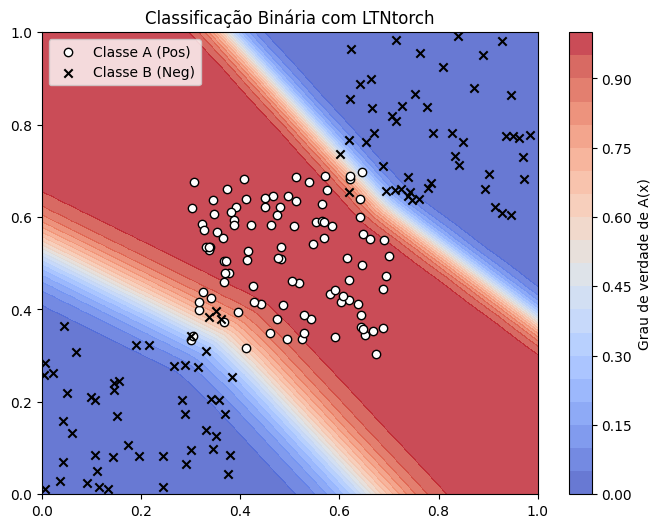

In [ ]:

# # Obtém a predição (valor de verdade) para cada ponto na grade
# with torch.no_grad():
#     truth_values = A(grid_torch)# .cpu().numpy()

# # Remodela para o formato da grade
# zz = truth_values.reshape(xx.shape)

# # Plota o limite de decisão (heatmap de satisfação)
# plt.figure(figsize=(7, 6))
# plt.contourf(xx, yy, zz, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.7)
# plt.colorbar(label='Satisfação do Predicado A(x)')
# # Plota os dados de treinamento originais por cima
# plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)', c='blue', edgecolors='k')
# plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)', c='red', edgecolors='k')
# plt.title('Limite de Decisão Aprendido pelo Predicado A(x)')
# plt.legend()
# plt.show()

with torch.no_grad():
    # 1. Criamos uma ltn.Variable temporária para a grade
    var_grid = ltn.Variable("grid", grid_torch)

    # 2. Passamos a VARIÁVEL para o predicado, não o tensor puro
    # 3. Usamos .value para pegar o tensor de volta do resultado LTN
    truth_values = A(var_grid).value.cpu().numpy()

zz = truth_values.reshape(xx.shape)

plt.figure(figsize=(8, 6))
# Mapa de calor da decisão
plt.contourf(xx, yy, zz, levels=20, cmap="coolwarm", alpha=0.8)
plt.colorbar(label='Grau de verdade de A(x)')

# Pontos originais
plt.scatter(data_pos.cpu()[:, 0], data_pos.cpu()[:, 1], label='Classe A (Pos)', c='white', edgecolors='black', marker='o')
plt.scatter(data_neg.cpu()[:, 0], data_neg.cpu()[:, 1], label='Classe B (Neg)', c='black', edgecolors='white', marker='x')

plt.title('Classificação Binária com LTNtorch')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import ltn
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

# Configuração
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# ==========================================
# 1. PREPARAR DADOS (O que faltava no artigo)
# ==========================================
# Vamos usar o CIFAR-10, mas filtrar apenas Gatos (índice 3) e Cachorros (índice 5)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Baixa o dataset
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Filtra para pegar apenas Gatos e Cachorros
idx = (torch.tensor(full_trainset.targets) == 3) | (torch.tensor(full_trainset.targets) == 5)
full_trainset.targets = torch.tensor(full_trainset.targets)[idx]
full_trainset.data = full_trainset.data[idx]

# Mapeia labels: Gato (3) vira 0, Cachorro (5) vira 1
# Isso ajuda a separar os dados para o LTN
# (No LTN não usamos labels 0 e 1 diretamente, mas precisamos separar os grupos)
cat_indices = (full_trainset.targets == 3)
dog_indices = (full_trainset.targets == 5)

cats_data = torch.tensor(full_trainset.data[cat_indices].transpose(0, 3, 1, 2)).float() / 255.0 # Ajuste formato imagem
dogs_data = torch.tensor(full_trainset.data[dog_indices].transpose(0, 3, 1, 2)).float() / 255.0

# Normaliza manualmente já que convertemos para tensor direto
cats_data = (cats_data - 0.5) / 0.5
dogs_data = (dogs_data - 0.5) / 0.5

# Cria DataLoaders separados para o LTN (conforme Seção 3 do paper)
# O paper diz: itera sobre batches de 'dog' e batches de 'cat'
batch_size = 32
min_len = min(len(cats_data), len(dogs_data)) # Garante tamanhos iguais

# Vamos usar apenas 500 imagens de cada para o treino ser rápido no exemplo
cats_data = cats_data[:500].to(device)
dogs_data = dogs_data[:500].to(device)

print(f"Imagens de gatos carregadas: {cats_data.shape}")
print(f"Imagens de cães carregadas: {dogs_data.shape}")

# ==========================================
# 2. DEFINIR O MODELO CNN (O predicado Dog)
# ==========================================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Entrada: 3 canais (RGB), 32x32 pixels (tamanho do CIFAR)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1) # Saída 1 valor (grau de verdade)
        self.sigmoid = nn.Sigmoid() # Garante intervalo [0, 1]

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instancia o predicado
cnn = SimpleCNN().to(device)
Dog = ltn.Predicate(cnn)

# ==========================================
# 3. LÓGICA LTN (Igual ao Paper/Exemplo anterior)
# ==========================================
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

optimizer = optim.Adam(Dog.parameters(), lr=0.001)

# ==========================================
# 4. LOOP DE TREINAMENTO
# ==========================================
print("Iniciando treinamento com imagens...")

# Precisamos criar batches manualmente no loop já que temos dois "datasets" (Gatos e Cães)
n_epochs = 50
steps_per_epoch = len(cats_data) // batch_size

for epoch in range(n_epochs):
    epoch_loss = 0.0

    # Embaralha índices a cada época
    perm = torch.randperm(len(cats_data))

    for i in range(steps_per_epoch):
        idx = perm[i*batch_size : (i+1)*batch_size]

        # Pega um batch de gatos e um batch de cães
        batch_cats = cats_data[idx]
        batch_dogs = dogs_data[idx]

        optimizer.zero_grad()

        # --- AQUI A MÁGICA DO LTN (Conforme Listing 1 do paper) ---
        # 1. Aterramento (Grounding) das variáveis com IMAGENS
        var_dog = ltn.Variable("dog", batch_dogs) # "Para todo cachorro..."
        var_cat = ltn.Variable("cat", batch_cats) # "Para todo gato..."

        # 2. Axiomas
        # "Imagens de cães devem satisfazer o predicado Dog"
        axiom_dog = Forall(var_dog, Dog(var_dog))

        # "Imagens de gatos NÃO devem satisfazer o predicado Dog"
        axiom_cat = Forall(var_cat, Not(Dog(var_cat)))

        # 3. Satisfação e Loss
        sat = SatAgg(axiom_dog, axiom_cat)
        loss = 1. - sat

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Mostra progresso
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss média = {epoch_loss / steps_per_epoch:.4f}")

print("Treino concluído!")

# ==========================================
# 5. TESTE RÁPIDO
# ==========================================
# Vamos testar com uma imagem de cada
print("\n--- Teste Final ---")
with torch.no_grad():
    # Pega o primeiro gato e cachorro do dataset
    sample_dog = dogs_data[0:1]
    sample_cat = cats_data[0:1]

    score_dog = Dog(ltn.Variable("x", sample_dog)).value.item()
    score_cat = Dog(ltn.Variable("x", sample_cat)).value.item()

    print(f"Predicado Dog(imagem_cachorro) = {score_dog:.4f} (Esperado: próximo de 1.0)")
    print(f"Predicado Dog(imagem_gato)     = {score_cat:.4f} (Esperado: próximo de 0.0)")

Usando dispositivo: cpu


100%|██████████| 170M/170M [00:03<00:00, 46.5MB/s]


Imagens de gatos carregadas: torch.Size([500, 3, 32, 32])
Imagens de cães carregadas: torch.Size([500, 3, 32, 32])
Iniciando treinamento com imagens...
Epoch 0: Loss média = 0.4986
Epoch 5: Loss média = 0.4524
Epoch 10: Loss média = 0.3886
Epoch 15: Loss média = 0.3235
Epoch 20: Loss média = 0.2184
Epoch 25: Loss média = 0.1637
Epoch 30: Loss média = 0.1577
Epoch 35: Loss média = 0.1184
Epoch 40: Loss média = 0.1000
Epoch 45: Loss média = 0.0826
Treino concluído!

--- Teste Final ---
Predicado Dog(imagem_cachorro) = 0.9991 (Esperado: próximo de 1.0)
Predicado Dog(imagem_gato)     = 0.0277 (Esperado: próximo de 0.0)
